# INFO 6106 - Neural Modeling: Final Project
# Lake Effect Snow using RNN and CNN models
**Submitted by:**
- Aditi Krishna
- Abhishek Shankar

## 1. Data Introduction

### 1.1 Files

Located in `~/DATA` folder upon logging into the server, you will find 2 `.csv` files and 2 folders. 

<img src="https://i.imgur.com/IFzSsX4.png" alt="image" width="75%">

1. `Annually_Combined_CSV`: This folder contains GOES satellite imagery data and meteorology data from local weather station in **Traverse City, Michigan** aggregated for each October (Fall) to the next March (Spring). (e.g.: **Fall 2015** to **Spring 2016** refers to **October 2015** to **March 2016**.) 

2. `GOES_Raw_Images`: This folder contains the GOES satellite imagery data in `.png` format, which is being processed by the official toolkit for result validation.

3. `2006Fall_2017Spring_GOES_meteo_combined.csv`: This is a `.csv` file which contains GOES satellite imagery data and meteorology data from local weather station in **Traverse City, Michigan** from `October 1, 2006 0:00` to `March 31, 2017 23:00`.

4. `lat_lon_1D_labels_for_plotting.csv`: This is a `.csv` file which contains a list of (longitude, latitude) points which represent the location of pixels in Lake Michigan area.

Next, we will delve into the details of the dataset.

#### 1.1.1 GOES Satellite Imagery and Meteorology Combined Dataset

There is a `.csv` file named `2006Fall_2017Spring_GOES_meteo_combined.csv`. It is roughtly **4.76 GB**, so please make sure you:

1. Have sufficient physical RAM that is equal or over 16 GB;

2. On Windows, turn on paging file. Tutorial can be found at

> https://www.howtogeek.com/126430/what-is-the-windows-page-file/

3. On Linux, turn on swap. Tutorial can be found at

> https://help.ubuntu.com/community/SwapFaq

By doing so, it will help you to get through the experiment without experiencing system hanging that can be both annoying and time-consuming.

But, if you _really_ do not have the needed disk space or RAM for the computation, then in the folder `~/DATA/Hourly_Combined_CSV`, you will find **11** hourly combined data files.

#### 1.1.2 Lake Michigan Area Longitude & Latitude Labels

In `lat_long_1D_labels_for_plotting.csv`, you will find a list of (longitude, latitude) points which represent the location of pixels in Lake Michigan area. This dataset can be used to construct a visualization for 1-D GOES satellite imagery data.

### 1.2 Data Description

This dataset contains hourly indexed GOES satellite imagery data and meteorology data, from `October 1, 2006 0:00` to `March 31, 2017 23:00`.


| Column Name           | Data Category     | Data Type                  | Description                                                  |
| :--------------------- | :-----------------: | :--------------------------: | :------------------------------------------------------------ |
| Date_UTC              | Timestamp         | `<String>`                 | The date of the data in the row in UTC timezone. This timezone is used by GOES satellites and the file naming follows the same convention. |
| Time_UTC              | Timestamp         | `<String>`                 | The time of the data in the row in UTC timezone. This timezone is used by GOES satellites and the file naming follows the same convention. |
| Date_CST              | Timestamp         | `<String>`                 | The date of the data in the row in UTC timezone. This timezone is used by weather station while collecting meteorology data. |
| Time_CST              | Timestamp         | `<String>`                 | The time of the data in the row in UTC timezone. This timezone is used by weather station while collecting meteorology data. |
| File_name_for_1D_lake | I/O               | `<String>`                 | The corresponding raw data file where the GOES satellite imagery data was extracted. Files can be found on server***. |
| File_name_for_2D_lake | I/O               | `<String>`                 | The corresponding processed data file where the GOES satellite imagery data was extracted. Files can be found on server***. |
| Lake_data_1D          | Satellite Imagery | `Array[<Float>]`           | 1-D array of floating point numbers which represent the flattened cloud pixel intensity of Lake Michigan area. The array has a length of `3,599`. |
| Lake_data_2D          | Satellite Imagery | `Array[Array[<Float>], …]` | 2-D array of floating point numbers which represent the cloud pixel intensity of Lake Michigan area. The structure of the array is: [[col 1], [col 2], ..], data can be used to reconstruct a 106 x 79 matrix. |
| Temp (F)              | Meteorology       | `<Integer>`                | Temperature (°F Dry Bulb)                                    |
| RH (%)                | Meteorology       | `<Float>`                  | Relative Humidity (%)                                        |
| Dewpt (F)             | Meteorology       | `<Integer>`                | Dew Point Temperature (°F)                                   |
| Wind Spd (mph)        | Meteorology       | `<Float>`                  | Wind Speed (mph)                                             |
| Wind Direction (deg)  | Meteorology       | `<Float>`                  | Wind Direction (degrees, measured every 10 degrees)          |
| Peak Wind Gust(mph)   | Meteorology       | `<Float>`                  | Wind Gust (mph)                                              |
| Low Cloud Ht (ft)     | Meteorology       | `<Float>`                  | Cloud Height—Lower Level of Cloud (feet)                     |
| Med Cloud Ht (ft)     | Meteorology       | `<Float>`                  | Cloud Height—Med Level of Cloud (feet)                       |
| High Cloud Ht (ft)    | Meteorology       | `<Float>`                  | Cloud Height—Upper Level of Cloud (feet)                     |
| Visibility (mi)       | Meteorology       | `<Float>`                  | Visibility (miles)                                           |
| Atm Press (hPa)       | Meteorology       | `<Float>`                  | Atmospheric Pressure (hPa, hecto-Pascals)                    |
| Sea Lev Press (hPa)   | Meteorology       | `<Float>`                  | Sea Level Pressure (hPa, hecto-Pascals)                      |
| Altimeter (hPa)       | Meteorology       | `<Float>`                  | Altimeter (hPa, hecto-Pascals)                               |
| Precip (in)           | Meteorology       | `<Float>`                  | Precipitation (inches)                                       |
| Wind Chill (F)        | Meteorology       | `<Integer>`                | Wind Chill (°F)                                              |
| Heat Index (F)        | Meteorology       | `<Integer>`                | Heat Index (°F)                                              |

**Non-numeric labels in meteorology data:**

> Missing values are indicated by "M" and "m". When observations note specific values as missing, "M" is used. The "m" is used when there is a lack of information from the observation.

`Lake_data_1D`: 

Each value in the array corresponds to a pixel within the Lake Michigan area. The longitude and latitude values of these pixels can be found in `2006Fall_2017Spring_GOES_meteo_combined.csv`. There are 3,599 data points which covers the Lake Michigan area.

`Lake_data_2D`: 

The 2-D array can be utilized to create a rectangular region that encompasses the Lake Michigan area. The area covers latitudes ranging from 41.78 to 45.98 with an increment of 0.04, and longitudes ranging from -87.90 to -84.78 with an increment of 0.04.

## 2. Understanding the data

The following section provides a simple function that can help you visualize the GOES satellite imagery data. An example usage is provided to help you understand how to use the function in your particular use case.

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

`Inputs`:

1. lat, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for latitude.
    
    
2. lon, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for longitude.
    
    
3. val, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary intensity values for cloud pixels.
    
    
4. fig_name, `<String>`
    
    This is a string representing the file name of the output image, excluding the .png extension.
 

`Output`:

1. status_code, `<Integer>`

    This is an integer value where `0` indicates that the function was able to successfully output the image file, and `255` indicates that the function failed to execute due to mismatched lengths in the lat, lon, and val inputs. 

In [14]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(fig_name+'.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

#### Reading the data

In [3]:
df_lat_lon = df_lat_lon = pd.read_csv('lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [4]:
df_lat_lon.shape

(3599, 2)

In [5]:
les = pd.read_csv('2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [6]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [7]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

---

`TIPS`:

See how the data in the cell is a large string? Therefore, you need `ast` to convert it to an actual list.

The ast package in Python is a built-in library that provides a way to work with abstract syntax trees (`ASTs`) in Python code. An `AST` is a tree-like data structure that represents the structure of code in a language-agnostic way. The ast package provides functions for parsing Python code into an `AST`, manipulating and analyzing the `AST`, and generating Python code from an `AST`. It is commonly used for writing code analysis and transformation tools.

---

In [8]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst

[0.0725,
 0.067499995,
 0.07,
 0.07,
 0.067499995,
 0.067499995,
 0.065,
 0.067499995,
 0.07,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.055,
 0.067499995,
 0.055,
 0.065,
 0.07,
 0.065,
 0.0725,
 0.0775,
 0.0625,
 0.067499995,
 0.0625,
 0.065,
 0.067499995,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.0625,
 0.065,
 0.06,
 0.06,
 0.0625,
 0.0625,
 0.067499995,
 0.067499995,
 0.067499995,
 0.067499995,
 0.0775,
 0.074999996,
 0.067499995,
 0.065,
 0.049999997,
 0.049999997,
 0.067499995,
 0.067499995,
 0.055,
 0.055,
 0.0725,
 0.067499995,
 0.065,
 0.0625,
 0.065,
 0.0625,
 0.065,
 0.057499997,
 0.065,
 0.0725,
 0.0625,
 0.0625,
 0.065,
 0.07,
 0.067499995,
 0.0625,
 0.057499997,
 0.055,
 0.0625,
 0.074999996,
 0.055,
 0.06,
 0.0625,
 0.067499995,
 0.057499997,
 0.0625,
 0.067499995,
 0.065,
 0.057499997,
 0.065,
 0.0625,
 0.0625,
 0.067499995,
 0.06,
 0.0625,
 0.067499995,
 0.065,
 0.085,
 0.067499995,
 0.082499996,
 0.057499997,
 0.0625,
 0.055,
 0.06,
 0.067499995,
 0.057499997,
 0.065,
 0.0625,


In [9]:
lat_lst = df_lat_lon['latitude'].to_list()
lat_lst

[41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 

In [10]:
lon_lst = df_lat_lon['longitude'].to_list()
lon_lst

[-87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.62,
 -87.62,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.6

In [11]:
# Make sure they have same len
print(len(data_sample_lst))
print(len(lat_lst))
print(len(lon_lst))

3599
3599
3599


0

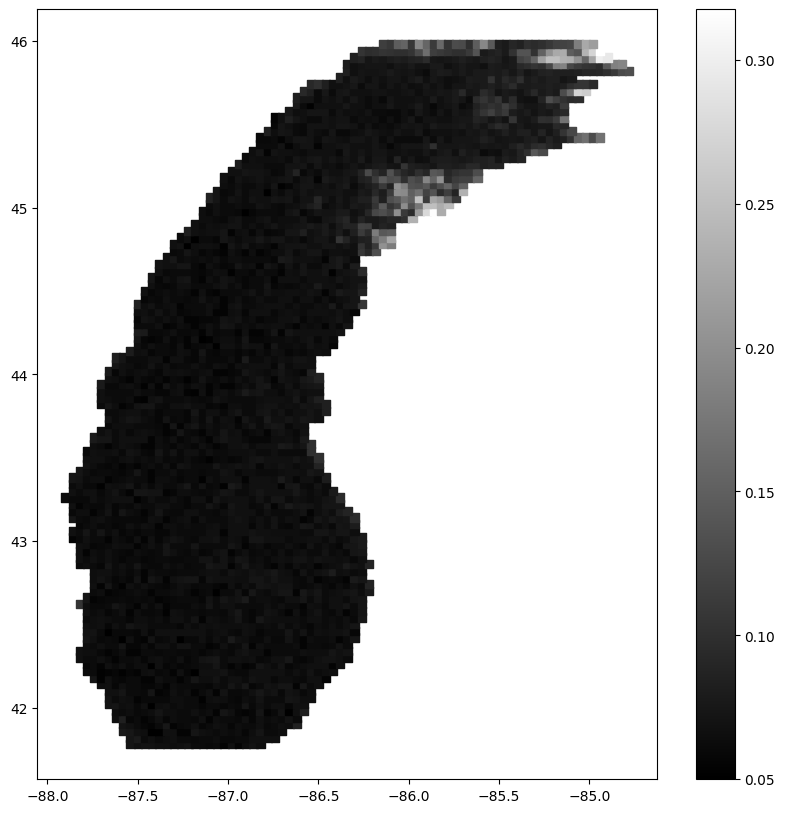

In [15]:
return_code = arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')
return_code

Note that completely white pixels (intensity of 1) delineate the shape of the lake. DO not mistaken these pixels for clouds!!!

In the imagery data, pixels with close-to-zero intensities represent the absence of clouds, while pixels with intensities close to 1 indicate the presence of moisture-retaining clouds. It is important to distinguish between these two types of pixels when processing and analyzing the data, as they can have significant impacts on the resulting insights and predictions.

Due to the nature of imagery data generated from the visible band, the quality of the imagery can be affected by the availability of sunlight. In situations where there is not enough sunlight hitting the surface of the earth, the resulting imagery may suffer from **lower quality** or **loss of data**. It is important to take this into consideration when processing and analyzing the data.

<img src="https://i.imgur.com/0IWa4os.png" alt="image" width="75%">

For instance, the image shown above corresponds to the GOES satellite imagery data captured at 12:00 PM on December 8, 2016, in the Coordinated Universal Time (UTC) time zone. It would be 7:00 AM in Central Standard Time. When we look at the histogram of the data, we will find:

<img src="https://i.imgur.com/vj32fvZ.png" alt="image" width="75%">

It is important to note that the visible band imagery data generated by the GOES satellite sensor suffers when there is no sufficient sunlight hitting the earth's surface, which can result in a lack of valuable data for analysis. Therefore, it is recommended to focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

## 2. Cleaning and Exploring the data

Reading the Michigan dataset.

In [16]:
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [17]:
print('Total observation count: ', len(les))

Total observation count:  48121


### Feature Engineering
#### Renaming columns

In [18]:
les.columns

Index(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake',
       'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)',
       'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)',
       'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)',
       'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)',
       'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)',
       'Wind Chill (F)', 'Heat Index (F)'],
      dtype='object')

In [19]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [20]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

Overview of count of `NC` values in **Wind_Chill_F** and **Heat_Index_F**.

In [21]:
# NC values in Wind_Chill_F
les.Wind_Chill_F.value_counts()

NC     19685
21       969
27       916
19       914
22       884
       ...  
-28        4
-24        2
-30        2
-29        2
-27        1
Name: Wind_Chill_F, Length: 79, dtype: int64

In [22]:
# NC values in Heat_Index_F
les.Heat_Index_F.value_counts()

NC    47787
0        30
80       13
82       10
81       10
86        8
84        7
85        5
83        5
88        2
87        2
90        2
89        1
Name: Heat_Index_F, dtype: int64

Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values.

In [23]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

#### Missing value analysis

In [24]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,0,0.000000
File_name_for_2D_lake,0,0.000000
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


Dropping null values.

In [25]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  47882


In [26]:
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,150,0,4100,4800,7000,10,984.0,1007.00,1006.80,0.00
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,150,0,6000,0,0,10,983.7,1006.50,1006.40,0.00
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,0,0,5500,11000,0,10,982.7,1005.70,1005.40,0.00
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,150,0,6000,0,0,10,982.0,1005.10,1004.70,0.00
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,0,0,2200,3500,0,8,982.0,1004.90,1004.70,0.02


#### Changing Datatype

In [27]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               47882 non-null  object
 1   Time_UTC               47882 non-null  object
 2   Date_CST               47882 non-null  object
 3   Time_CST               47882 non-null  object
 4   File_name_for_1D_lake  47882 non-null  object
 5   File_name_for_2D_lake  47882 non-null  object
 6   Lake_data_1D           47882 non-null  object
 7   Lake_data_2D           47882 non-null  object
 8   Temp_F                 47882 non-null  object
 9   RH_pct                 47882 non-null  object
 10  Dewpt_F                47882 non-null  object
 11  Wind_Spd_mph           47882 non-null  object
 12  Wind_Direction_deg     47882 non-null  object
 13  Peak_Wind_Gust_mph     47882 non-null  object
 14  Low_Cloud_Ht_ft        47882 non-null  object
 15  Med_Cloud_Ht_ft    

In [28]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [29]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               47882 non-null  object 
 1   Time_UTC               47882 non-null  object 
 2   Date_CST               47882 non-null  object 
 3   Time_CST               47882 non-null  object 
 4   File_name_for_1D_lake  47882 non-null  object 
 5   File_name_for_2D_lake  47882 non-null  object 
 6   Lake_data_1D           47882 non-null  object 
 7   Lake_data_2D           47882 non-null  object 
 8   Temp_F                 47882 non-null  float64
 9   RH_pct                 47882 non-null  float64
 10  Dewpt_F                47882 non-null  float64
 11  Wind_Spd_mph           47882 non-null  int64  
 12  Wind_Direction_deg     47882 non-null  int64  
 13  Peak_Wind_Gust_mph     47882 non-null  int64  
 14  Low_Cloud_Ht_ft        47882 non-null  int64  
 15  Me

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [30]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,20,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,330,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,310,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0


#### New column LES_Snowfall

In [31]:
filtered_les.loc[(filtered_les['Temp_F'] <= 32) & (filtered_les['Precip_in'] > 0), 'LES_Snowfall'] = 1
filtered_les.loc[(filtered_les['Temp_F'] > 32) | (filtered_les['Precip_in'] <= 0), 'LES_Snowfall'] = 0
filtered_les

C:\Users\krish\anaconda3\envs\neuralnets\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\krish\anaconda3\envs\neuralnets\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,0.0


We drop the *Date* and *Time* columns since it does not add value to the model.

In [32]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,41.0,10,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,40.0,3,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,43.0,6,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,46.0,0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,45.0,0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0



Let's look at the summary statistics of the final dataset.

In [33]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
count,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000,15959.000000
mean,34.931261,68.740335,25.234351,7.137039,158.714832,4.500971,4563.800363,3457.098816,1033.362993,8.174698,990.931687,960.019663,1014.892355,0.002377,0.022057
std,14.344283,14.927241,13.538403,5.093937,128.081797,9.510925,5747.505620,6318.061684,3981.234855,3.033164,41.719389,232.924553,26.926521,0.016545,0.146872
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.300000,1016.400000,1016.300000,0.000000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,4000.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000,1.000000


In [34]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  15959
Total number of features:  19


In [35]:
filtered_les.LES_Snowfall[5000:14000].value_counts()

0.0    8796
1.0     204
Name: LES_Snowfall, dtype: int64

Due to the memory error we keep running into, we use the first 14000 observations for the model training.

In [36]:
filtered_les = filtered_les[:14000]

In [37]:
print('Total observations after limiting: ', filtered_les.shape[0])
print('Total number of features after limiting: ', filtered_les.shape[1])

Total observations after limiting:  14000
Total number of features after limiting:  19


Check the feature datatypes annd null count before we go ahead with modeling.

In [38]:
filtered_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   File_name_for_1D_lake  14000 non-null  object 
 1   File_name_for_2D_lake  14000 non-null  object 
 2   Lake_data_1D           14000 non-null  object 
 3   Lake_data_2D           14000 non-null  object 
 4   Temp_F                 14000 non-null  float64
 5   RH_pct                 14000 non-null  float64
 6   Dewpt_F                14000 non-null  float64
 7   Wind_Spd_mph           14000 non-null  int64  
 8   Wind_Direction_deg     14000 non-null  int64  
 9   Peak_Wind_Gust_mph     14000 non-null  int64  
 10  Low_Cloud_Ht_ft        14000 non-null  int64  
 11  Med_Cloud_Ht_ft        14000 non-null  int64  
 12  High_Cloud_Ht_ft       14000 non-null  int64  
 13  Visibility_mi          14000 non-null  int64  
 14  Atm_Press_hPa          14000 non-null  float64
 15  Se

### Exploratory Data Analysis
#### Plotting the pearson correlation plot to visualise the correlation between various features

Text(0.5, 1.0, 'Correlation Matrix')

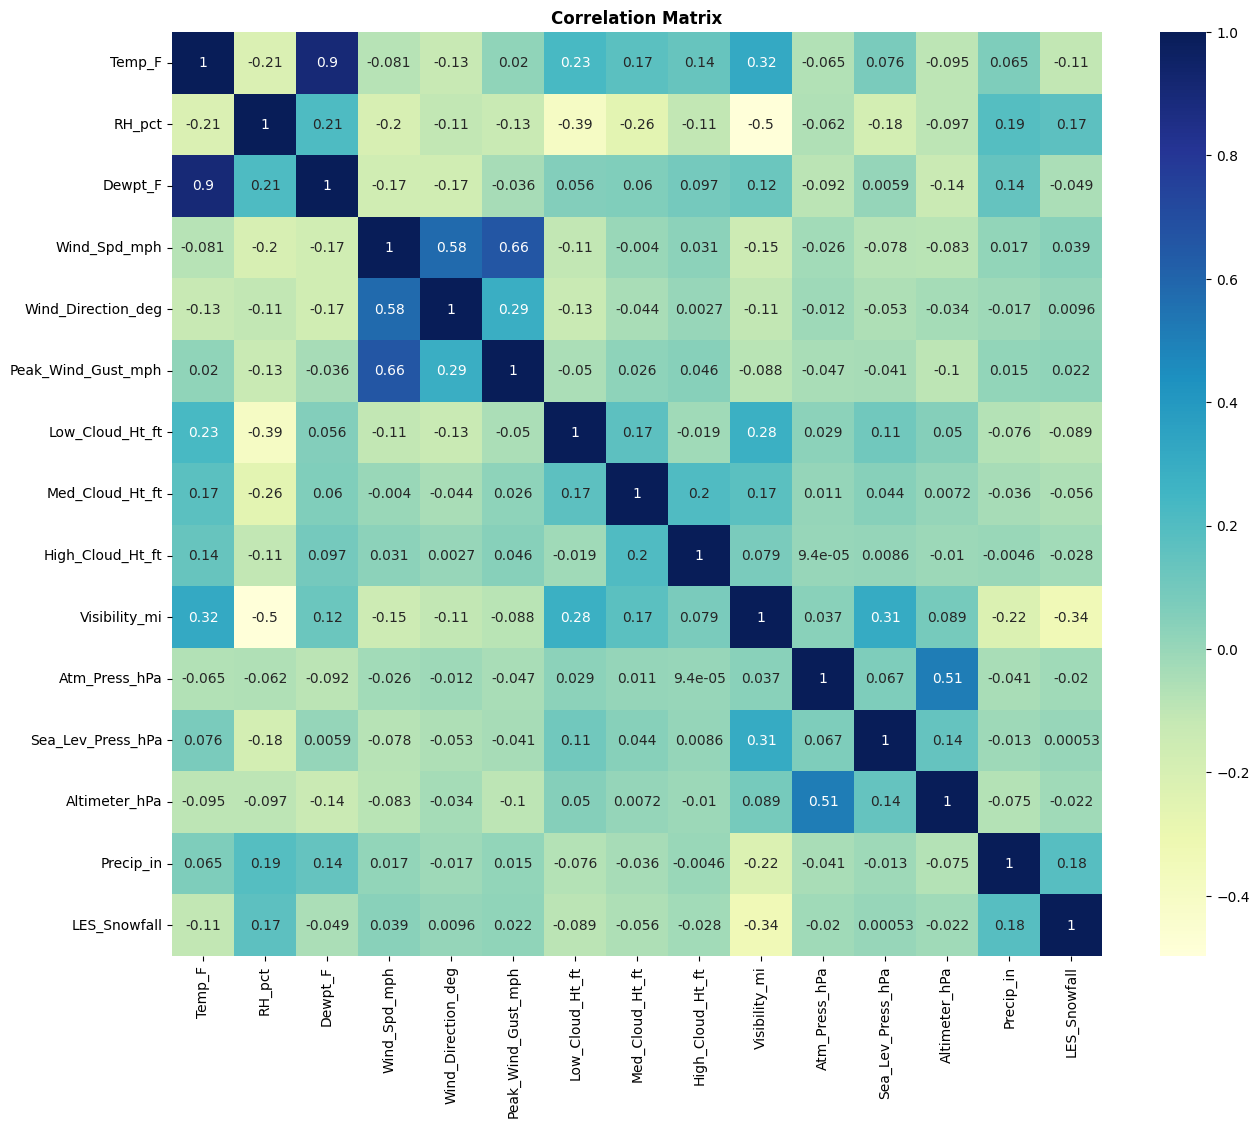

In [39]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other
- We remove the ones that have shown `positive correlation` greater than 0.6
    - **Temp_F** is highly correlated with **Dewpt_F**
    - **Wind_Spd_mph** is highly correlated with **Peak_Wind_Gust_mph**
- We also note some strong `negative correlation`, but all of them are greater than -0.6, hence we do not drop those features

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

In [40]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  14000
Total number of features:  17


,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0


#### Plotting pairplot to visualize the non-linear relationships between various features

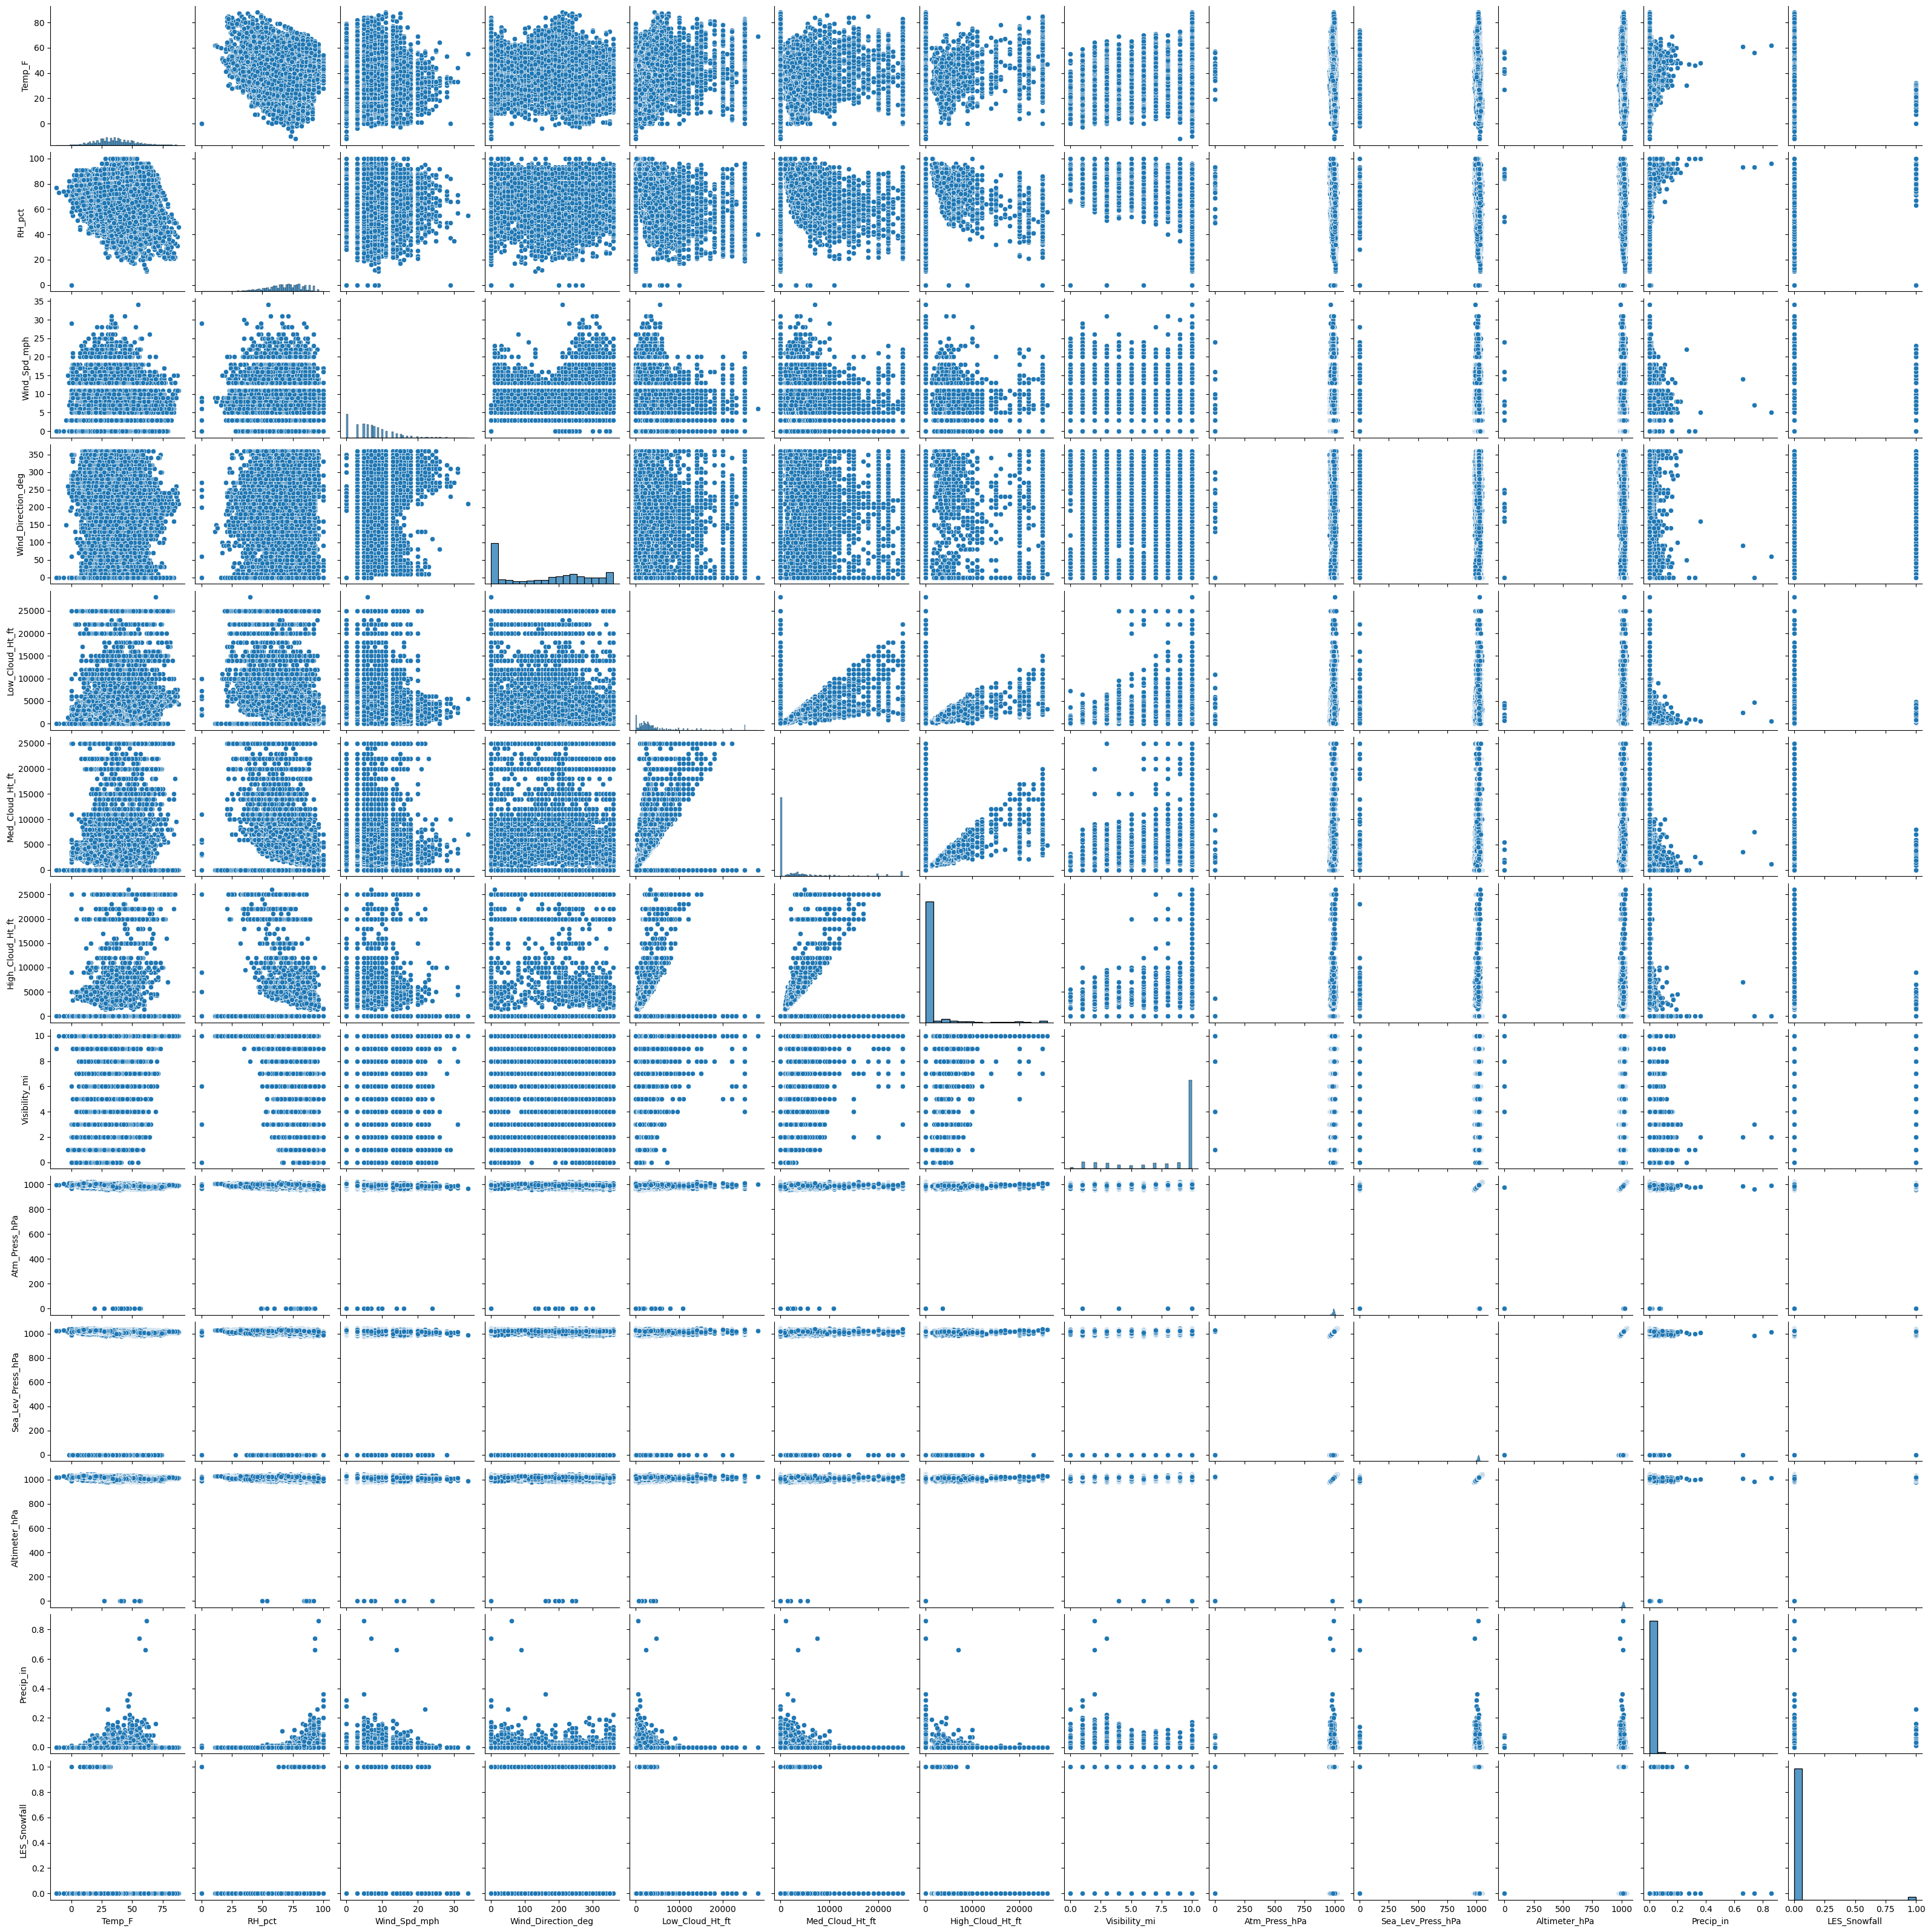

In [41]:
sns.pairplot(filtered_les)

#### Distribution of the numerical features in the dataset

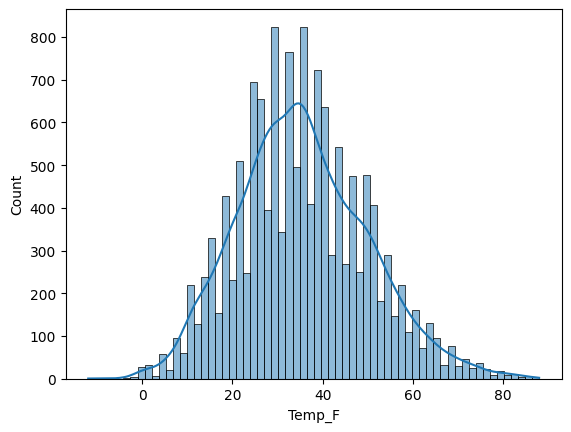

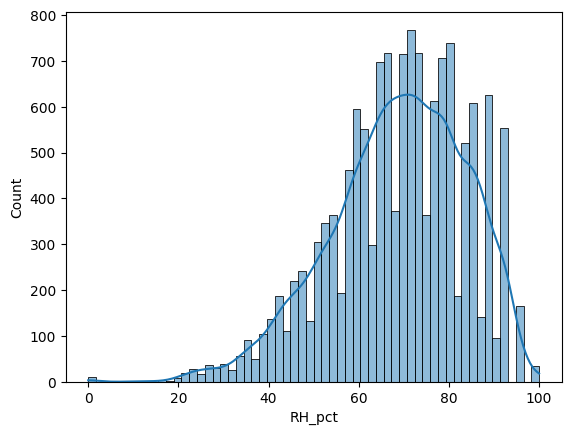

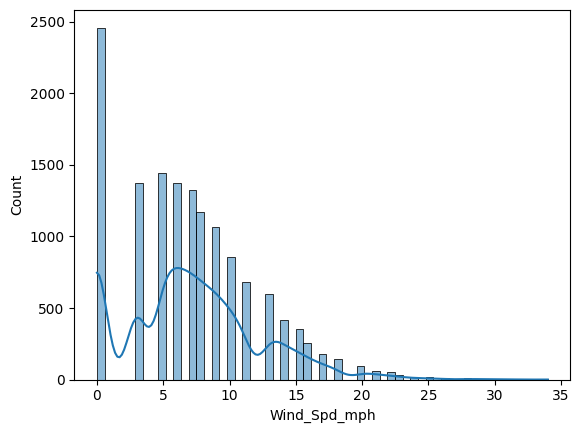

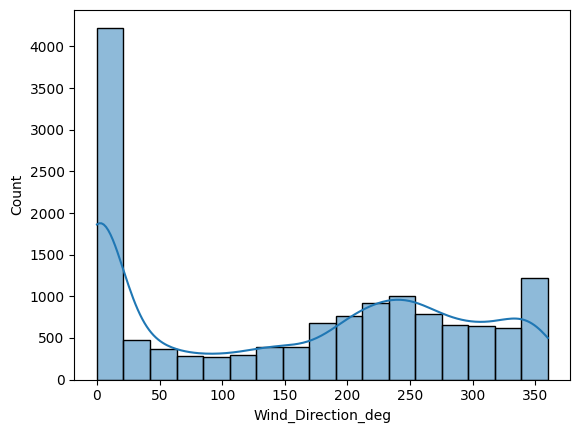

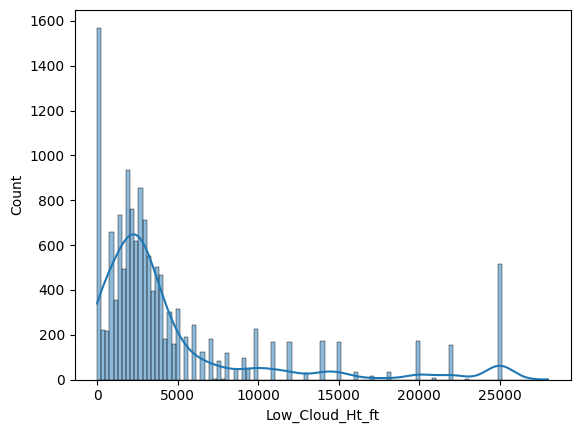

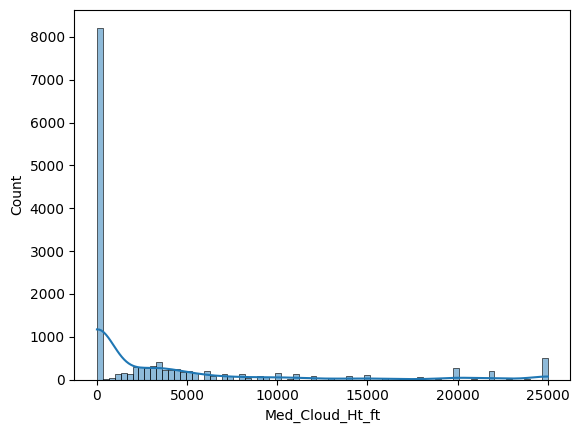

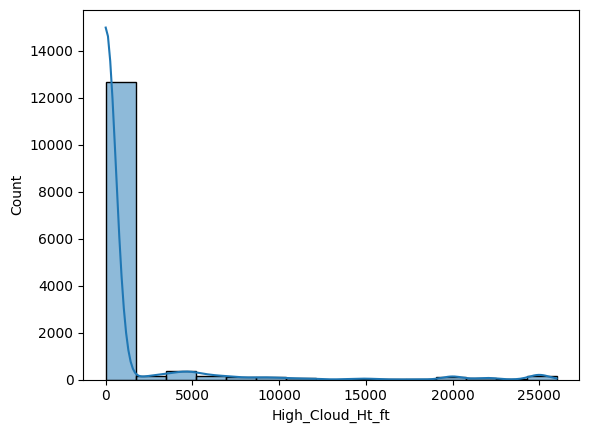

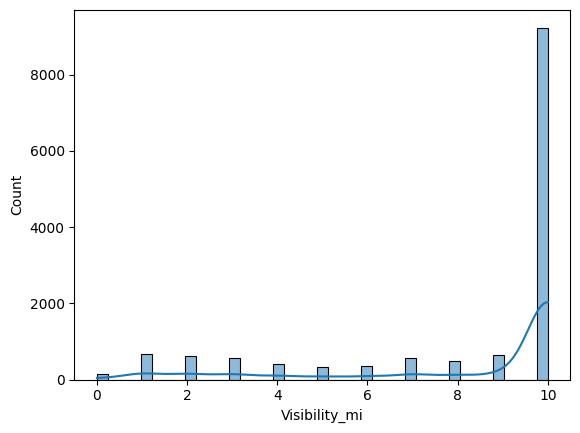

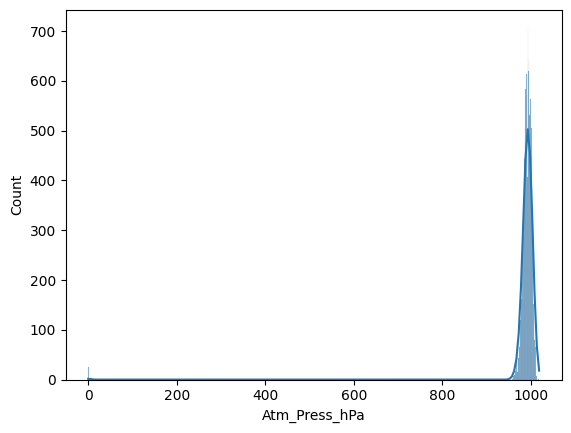

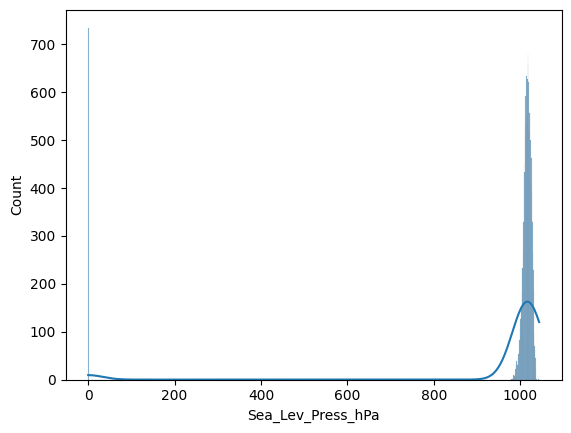

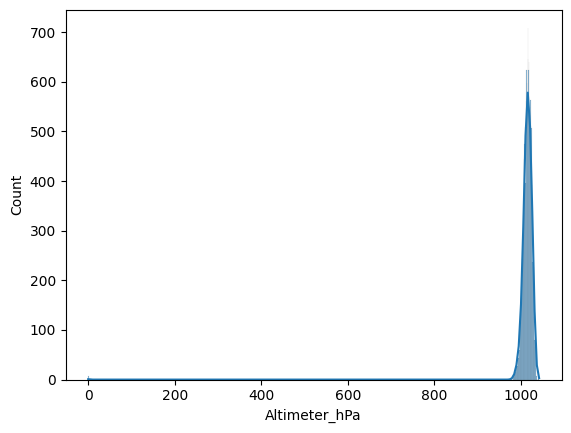

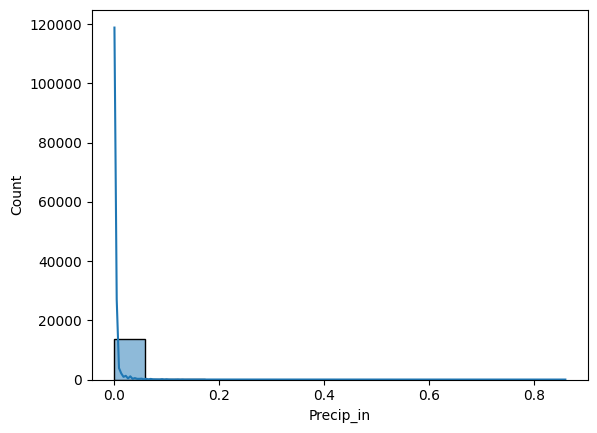

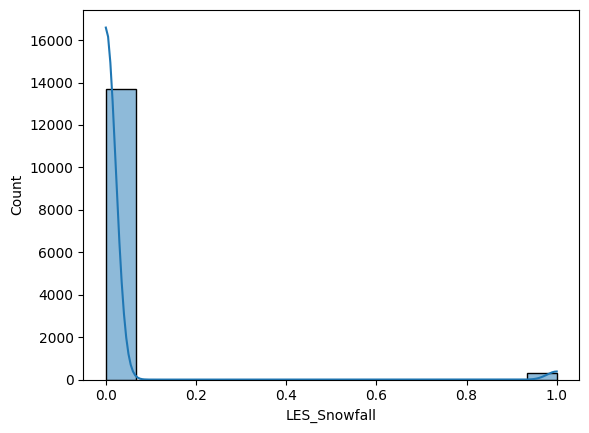

In [42]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(filtered_les)

#### Visualizing the imbalance in the dataset

In [291]:
filtered_les['LES_Snowfall'].value_counts()

0.0    13686
1.0      314
Name: LES_Snowfall, dtype: int64

<AxesSubplot:xlabel='LES_Snowfall', ylabel='count'>

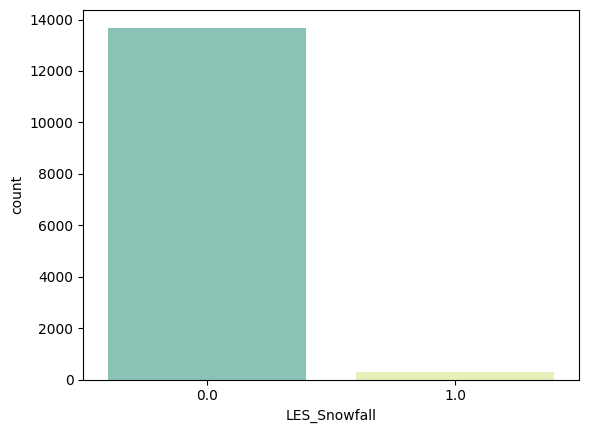

In [292]:
sns.countplot(x = filtered_les['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

We see that the dataset is highly imbalanced.

In [293]:
filtered_les.head()

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0


## Baseline model: Decision Tree Classifier

Importing modules from Sklearn.

In [43]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
import pickle

In [44]:
new_les = filtered_les.iloc[:, 4:]
new_les.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0


We per the discussion in class, we drop **Temp (F), Precipitation (in)** columns since it makes the tree super decisive. We also drop the **Date columns** since it does not add value to the model. 

After cleaning the dataset, we create a copy of the dataset for further data manipulation. 

In [45]:
# Dropping additional columns
new_les = new_les.drop(['Temp_F', 'Precip_in'], axis=1)
new_les = new_les.reset_index(drop=True)
new_les

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,LES_Snowfall
0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13995,88.0,5,160,1800,0,0,1,998.7,1022.6,1021.7,1.0
13996,92.0,5,0,800,0,0,1,998.3,1022.4,1021.3,1.0
13997,84.0,6,130,3500,0,0,4,997.0,1020.8,1020.0,1.0
13998,88.0,7,140,2100,0,0,1,995.3,1019.2,1018.3,1.0


#### Separating X and y

In [46]:
X_les = new_les.loc[:, new_les.columns != 'LES_Snowfall']
y_les = new_les.LES_Snowfall

#### Imbalance in the data

In [47]:
y_les.value_counts()

0.0    13686
1.0      314
Name: LES_Snowfall, dtype: int64

We can see that the data is heavily imbalanced. The imbalanced data for decision trees is a big problem since it democratically searches for impurity reduction across all observations.

#### Scaling the data
Using `MinMaxScaler` to scale the features and then recreating a dataframe with same column names.

In [48]:
# Fitting MinMaxScaler()
scaler = MinMaxScaler()
# Transform data and put it together into a 
scaled = scaler.fit_transform(X_les)
X_les = pd.DataFrame(scaled, columns = X_les.columns.tolist())
X_les.head()

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
0,0.49,0.294118,0.750000,0.128571,0.0,0.0,1.0,0.976249,0.975278,0.976302
1,0.47,0.088235,0.000000,0.000000,0.0,0.0,1.0,0.976249,0.975182,0.976302
2,0.55,0.176471,0.111111,0.000000,0.0,0.0,1.0,0.976249,0.975278,0.976302
3,0.71,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.976249,0.975278,0.976302
4,0.82,0.000000,0.000000,0.285714,0.0,0.0,1.0,0.976249,0.975374,0.976302


### Data Preparation
#### Function to prepare X & y based on the n_past hours of observations and predicting n_future hours into the future
- The idea behind this data preparation function is to introduce a sliding window over the time series data
- We convert the time series dataset to be fit for a supervised learning problem
    - For example, if it is snowing at 2pm in the day then it does seem highly likely that it will snow at 3pm as well 
- In the function below we add the following parameters:
    - **n_past** : the number of hours from the past observations to consider for prediction
    - **n_future** :the number of hours into the future that we aim to predict
- `Preparing X with sliding windows`
    - The above operation takes 10 features for every hour of observation
    - After running the function the number of features expand from 10 to (10 * n_past hours) of features
    - The decision tree model will then split at features with highest information gain at each hour of the sliding window
- `Preparing y with sliding windows`
    - We *assume*, that if at any hour **within** the window of now until the **n_future** hour, if the weather is that of snowing (LES_snowfall == 1), then it will snow and y will become 1, else it will be 0

In [49]:
n_past = 1
n_future = 72

def data_prep(X_les = X_les, y_les = y_les, n_past = n_past, n_future = n_future):
    X, y = list(), list()
    for i in range(n_past, len(X_les) - n_future): 
        '''
        1. Sliding window with 1 hour of past data and predicting 72 hours into the future
        (n_past = 1, n_future = 72)
        ==> X_les[ 1-1 : 1 ] = X_les[0 : 1]
        ==> X_les[ 2-1: 2 ] = X_les[1 : 2]
        ==> X_les[ 3-1: 3 ] = X_les[2 : 3] ...
        
        1. Sliding window with 24 hours of past data and predicting 72 hours into the future
        (n_past = 24, n_future = 72)
        ==> X_les[ 24-24 : 24 ] = X_les[0 : 24]
        ==> X_les[ 25-24: 25 ] = X_les[1 : 25]
        ==> X_les[ 26-24: 26 ] = X_les[2 : 26] ...
        '''
        # Preparing X
        # Converting each row of features from the dataframe into an array
        observations = np.array(X_les[i - n_past : i]) 
        # Reshape each observation from the sliding window into a flattened array, then append into list X
        X.append(np.reshape(observations,(-1,))) 
        
        # Preparing y
        # Check if sum of all 0s and 1s from ith hour to i + future_hours > 0, then snowfall = 1
        within_sum = y_les[i : i + n_future].sum()
        if within_sum > 0:
            y.append(1)
        else:
            y.append(0)
        
    return np.array(X), np.array(y)

Let’s assume that given the past 1 hour of observations, we need to forecast the 72 hours into the future.

In [321]:
n_past = 1
n_future = 72

# Index starts from n_past = 1
# X_les[i - n_past : i]
X_les[1 - 1 : 1]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
0,0.49,0.294118,0.75,0.128571,0.0,0.0,1.0,0.976249,0.975278,0.976302


- Incrementing index by 1 for n_past = 1

In [322]:
n_past = 1
n_future = 72

# Index starts from n_past = 1
# X_les[i - n_past : i]
X_les[2 - 1 : 2]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
1,0.47,0.088235,0.0,0.0,0.0,0.0,1.0,0.976249,0.975182,0.976302


Let’s assume that given the past 2 hour of observations, we need to forecast the 72 hours into the future.

In [323]:
n_past = 2
n_future = 72

# Index starts from n_past = 2
# X_les[i - n_past : i]
X_les[2 - 2 : 2]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
0,0.49,0.294118,0.75,0.128571,0.0,0.0,1.0,0.976249,0.975278,0.976302
1,0.47,0.088235,0.00,0.000000,0.0,0.0,1.0,0.976249,0.975182,0.976302


- Incrementing index by 1 for n_past = 2

In [324]:
n_past = 2
n_future = 72

# Index starts from n_past = 2
# X_les[i - n_past : i]
X_les[3 - 2 : 3]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
1,0.47,0.088235,0.000000,0.0,0.0,0.0,1.0,0.976249,0.975182,0.976302
2,0.55,0.176471,0.111111,0.0,0.0,0.0,1.0,0.976249,0.975278,0.976302


In [325]:
n_past = 24
n_future = 72

# Index starts from n_past = 24
# X_les[i - n_past : i]
X_les[24 - 24 : 24]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
0,0.49,0.294118,0.750000,0.128571,0.00,0.0,1.0,0.976249,0.975278,0.976302
1,0.47,0.088235,0.000000,0.000000,0.00,0.0,1.0,0.976249,0.975182,0.976302
2,0.55,0.176471,0.111111,0.000000,0.00,0.0,1.0,0.976249,0.975278,0.976302
3,0.71,0.000000,0.000000,0.000000,0.00,0.0,1.0,0.976249,0.975278,0.976302
4,0.82,0.000000,0.000000,0.285714,0.00,0.0,1.0,0.976249,0.975374,0.976302
5,0.86,0.000000,0.000000,0.000000,0.00,0.0,1.0,0.976543,0.975565,0.976590
6,0.86,0.088235,0.444444,0.428571,0.00,0.0,1.0,0.975856,0.974895,0.976015
7,0.79,0.088235,0.361111,0.392857,0.00,0.0,1.0,0.975856,0.974895,0.976015
8,0.53,0.441176,0.611111,0.178571,0.00,0.0,1.0,0.971342,0.970103,0.971409
9,0.57,0.382353,0.583333,0.178571,0.40,0.0,1.0,0.971342,0.970008,0.971409


- Incrementing index by 1 for n_past = 24

In [326]:
n_past = 24
n_future = 72

# Index starts from n_past = 24
# X_les[i - n_past : i]
X_les[25 - 24 : 25]

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa
1,0.47,0.088235,0.000000,0.000000,0.000,0.0,1.0,0.976249,0.975182,0.976302
2,0.55,0.176471,0.111111,0.000000,0.000,0.0,1.0,0.976249,0.975278,0.976302
3,0.71,0.000000,0.000000,0.000000,0.000,0.0,1.0,0.976249,0.975278,0.976302
4,0.82,0.000000,0.000000,0.285714,0.000,0.0,1.0,0.976249,0.975374,0.976302
5,0.86,0.000000,0.000000,0.000000,0.000,0.0,1.0,0.976543,0.975565,0.976590
6,0.86,0.088235,0.444444,0.428571,0.000,0.0,1.0,0.975856,0.974895,0.976015
7,0.79,0.088235,0.361111,0.392857,0.000,0.0,1.0,0.975856,0.974895,0.976015
8,0.53,0.441176,0.611111,0.178571,0.000,0.0,1.0,0.971342,0.970103,0.971409
9,0.57,0.382353,0.583333,0.178571,0.400,0.0,1.0,0.971342,0.970008,0.971409
10,0.63,0.235294,0.583333,0.178571,0.400,0.0,1.0,0.971342,0.970008,0.971409


## Predicting 5 days (5 x 7 hours) in advance based on 3 day (3 x 7 hours) of historical data/observation

Preparing the dataset.

In [343]:
# Preparing data
X, y = data_prep(X_les, y_les, 35, 21) # 5 days of past history and 3 predicting 3 days into the future
print('Length of X and y: ', len(X))

Length of X and y:  13944


Let's see what the imbalance looks like after data preparation.

In [344]:
np.unique(y, return_counts=True)

(array([0, 1]), array([11101,  2843], dtype=int64))

The data is still highly imbalanced, but looks better than before. The number of Snowfall events have increased *10 fold*.

#### Splitting data into Train and Test datasets

In [345]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [346]:
X_train.shape

(10458, 350)

#### Gridsearch for best parameters to deal with imbalanced classes
We want to find the optimal class_weights hyperparameter.

In [348]:
dtree_param_grid = {'class_weight' : [{0 : 1, 1 : 100}, {0 : 1, 1 : 10}], 
                    'max_depth': range(1, 20, 2), 
                    'max_features': list(range(1, 21, 2)),
                    'min_samples_split': range(10, 50, 10), 
                    'criterion': ['gini', 'entropy']
                    }

# Define DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid = dtree_param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit
grid_result = grid.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.7157037362174564
Best Hyperparameters: {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 11, 'max_features': 19, 'min_samples_split': 40}


#### Saving the model with the best estimated hyperparameters

In [349]:
# Best estimator value
best_model = grid_result.best_estimator_

# Save pickled model
pickle.dump(best_model, open('saved_models/baseline_dtree_35_21.pkl', 'wb'))

#### Evaluating the model with best estimated hyperparameters

In [350]:
# Evaluations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean (%f) and Std dev (%f) with: %r" % (mean, stdev, param))

Mean (0.525774) and Std dev (0.029688) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
Mean (0.522697) and Std dev (0.031580) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 20}
Mean (0.515407) and Std dev (0.022202) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
Mean (0.523660) and Std dev (0.033366) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 40}
Mean (0.530452) and Std dev (0.043424) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 10}
Mean (0.531864) and Std dev (0.045531) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 20}
Mean (0.532723) and Std dev (0.044966) with: {

#### Loading the saved model and performing prediction on test dataset

In [351]:
# Load pickled model
pickled_model = pickle.load(open('saved_models/baseline_dtree_35_21.pkl', 'rb'))

# Decision Tree
y_pred = pickled_model.predict(X_test)

# Result
print(f'False Predictions: {(abs(y_pred-y_test)).sum()}/{len(y_pred)} | Accuracy: {(1-(abs(y_pred-y_test)).sum()/len(y_pred))*100}')

False Predictions: 1577/3486 | Accuracy: 54.761904761904766


#### Evaluation metrics for classification: ROC-AUC, Recall, Precision, F1-Score

In [352]:
# Result
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1-Score: {}".format(f1_score(y_test, y_pred)))

ROC-AUC: 0.6405419539233022
Recall: 0.7945007235890015
Precision: 0.2767137096774194
F1-Score: 0.4104672897196262


### Observations: 
- We perform hyperparameter tuning to optimize the values for the following parameters
    - class_weight
        - The majority class (0: not snowing) received a weight of 1
        - The minority class (1: snowing) received a weight of 10
    - 'max_depth'
        - To control the depth of the tree so that we do not overfit the model, which came out to be 7
    - 'max_features'
        - The optimal number of features to consider when looking for the best split, which came out to be 19
    - 'min_samples_split'
        - specifies the minimum number of samples required to split an internal node, which came out to be 40
- From the model with a sliding window of only 24 hours and predicting 72 hours ahead gets
    - Accuracy: 54.76%
    - ROC-AUC: 0.64
    - F1-Score: 0.41
- Overall, the F-1 score, Accuracy and ROC-AUC are quite poor for this model

# Creating a copy of the filtered dataset for further data manipulation and .png image conversion

In [363]:
new_les

,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,LES_Snowfall
0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13995,88.0,5,160,1800,0,0,1,998.7,1022.6,1021.7,1.0
13996,92.0,5,0,800,0,0,1,998.3,1022.4,1021.3,1.0
13997,84.0,6,130,3500,0,0,4,997.0,1020.8,1020.0,1.0
13998,88.0,7,140,2100,0,0,1,995.3,1019.2,1018.3,1.0


In [52]:
filtered_les_new = new_les.copy()
filtered_les_new['idx'] = np.arange(len(filtered_les_new))
# filtered_les_new = filtered_les_new.drop(['Temp_F', 'Precip_in'], axis=1)
filtered_les_new = filtered_les_new.reset_index(drop=True)

In [53]:
# Information about dataset shape
print('Total observations: ', filtered_les_new.shape[0])
print('Total number of features: ', filtered_les_new.shape[1])
filtered_les_new

Total observations:  14000
Total number of features:  12


,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,LES_Snowfall,idx
0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0
1,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,1
2,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,2
3,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,3
4,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,88.0,5,160,1800,0,0,1,998.7,1022.6,1021.7,1.0,13995
13996,92.0,5,0,800,0,0,1,998.3,1022.4,1021.3,1.0,13996
13997,84.0,6,130,3500,0,0,4,997.0,1020.8,1020.0,1.0,13997
13998,88.0,7,140,2100,0,0,1,995.3,1019.2,1018.3,1.0,13998


In [366]:
filtered_les_new.to_csv('updated.csv')

We use the above saved numerical data and use it for training our RNN architecture in the next notebook.

### Converting array to .png images (RUN ONLY ONCE!)

In [56]:
filtered_les_new = filtered_les.copy()
filtered_les_new['idx'] = np.arange(len(filtered_les_new))
# filtered_les_new = filtered_les_new.drop(['Temp_F', 'Precip_in'], axis=1)
filtered_les_new = filtered_les_new.reset_index(drop=True)

We rewrite the array_to_png function to remove the colormap and axis, so that clean images can be stored to train the models:

In [68]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(fig_name+'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

- First we build the mask around Lake Michigan 
    - This is done to zero out all the padding aroung the lake
- Once the mask is acquired, we mask out all the other images and save them (this way the unnecessary 1 padding is avoided to confuse the models)